In [2]:
import torch
import numpy as np

#TENSORS

#1 element tensor
t1 = torch.tensor(4.)
print("t1 tensor: ", t1)

#2D tensor
t2 = torch.tensor([[1., 2], [3, 4]])
print("t2 tensor: ", t2)

#3D tensor
t3 = torch.tensor([[[1., 2, 3],[4, 5, 6], [7, 8, 9]],
                   [[10, 11, 12], [13, 14, 15], [16, 17, 18]]])
print("t3 tensor: ", t3)
t3.shape

t1 tensor:  tensor(4.)
t2 tensor:  tensor([[1., 2.],
        [3., 4.]])
t3 tensor:  tensor([[[ 1.,  2.,  3.],
         [ 4.,  5.,  6.],
         [ 7.,  8.,  9.]],

        [[10., 11., 12.],
         [13., 14., 15.],
         [16., 17., 18.]]])


torch.Size([2, 3, 3])

In [2]:
import torch
import numpy as np

#TENSORS OPERATIONS

x = torch.tensor(3., requires_grad = True)
w = torch.tensor(4., requires_grad = True)
b = torch.tensor(5., requires_grad = True)

y1 = w * x + b
y2 = w * x + b
y3 = w * x + b**2


#Compute derivatives
y1.backward()
y2.backward()
y3.backward()

print("y1 = ", y1)
print("y2 = ", y2)
print("y3 = ", y3)




#When you do that, all gradient calculations are summed up 
print("dy/dx: ", x.grad)
print("dy/dw: ", w.grad)
print("dy/db: ", b.grad)



y1 =  tensor(17., grad_fn=<AddBackward0>)
y2 =  tensor(17., grad_fn=<AddBackward0>)
y3 =  tensor(37., grad_fn=<AddBackward0>)
dy/dx:  tensor(12.)
dy/dw:  tensor(9.)
dy/db:  tensor(12.)


In [4]:
import torch
import numpy as np

#To keep derivative calculation simple, this is the example

#TENSORS OPERATIONS

x = torch.tensor(3., requires_grad = True)
w = torch.tensor(4., requires_grad = True)
b = torch.tensor(5., requires_grad = True)

y1 = w * x + b**2

#Compute derivatives
y1.backward()

print("y1 = ", y1)


#When you do that, all gradient calculations are summed up 
print("dy/dx: ", x.grad)
print("dy/dw: ", w.grad)
print("dy/db: ", b.grad)

y1 =  tensor(37., grad_fn=<AddBackward0>)
dy/dx:  tensor(4.)
dy/dw:  tensor(3.)
dy/db:  tensor(10.)


In [6]:
import torch
import numpy as np

x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = torch.tensor([2.0, 3.0, 1.0], requires_grad=True)

z = x @ y  #Matrix multiplication

print("z= ",z)

xx = x.detach().numpy()
yy = y.detach().numpy()

zz1 = np.matmul(xx,yy)
print("zz1= ",zz1)

zz2 = np.dot(xx,yy)
print("zz2= ",zz2)

xx = torch.from_numpy(xx)
yy = torch.from_numpy(yy)

zz3=torch.matmul(xx,yy)
print("zz3= ",zz3)



z=  tensor(11., grad_fn=<DotBackward0>)
zz1=  11.0
zz2=  11.0
zz3=  tensor(11.)


In [82]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# Define a simple operation
y = x * 2
print("y: ", y)

# Calculate z
z = torch.cat((y[0:1]**3, y[1:2]**2, y[2:3]**3)) # to concatenate tensors and y[0:1], y[1:2], and y[2:3] are used to select elements while maintaining the computational graph.
print("z: ", z)

# Compute the gradients
z.backward(torch.ones_like(z))

# Gradients are stored in x.grad
print("x.grad: ", x.grad)


y:  tensor([2., 4., 6.], grad_fn=<MulBackward0>)
z:  tensor([  8.,  16., 216.], grad_fn=<CatBackward0>)
x.grad:  tensor([ 24.,  16., 216.])


In [30]:
x = np.array([[1, 2], [3, 4]])
print("x: ", x)

#Convert numpy array to a torch tensor
y = torch.from_numpy(x)
print("y: ", y)

#Convert torch tensor to numpy array
z = y.numpy()
print("z: ", np.sqrt()

x:  [[1 2]
 [3 4]]
y:  tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
z:  [[1 2]
 [3 4]]


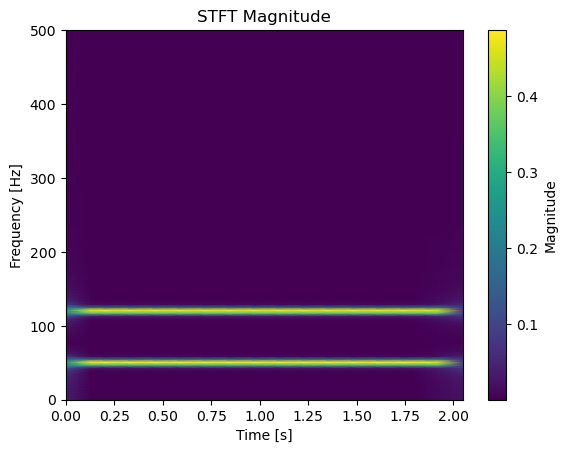

In [7]:
#Short Time Fourier Transform Example-1/2

import numpy as np
from scipy.signal import stft
import matplotlib.pyplot as plt

# Generate a sample signal (sinusoidal wave with varying frequency)
fs = 1000  # Sampling frequency
t = np.linspace(0, 2, 2 * fs, endpoint=False)  # Time array
signal = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)

# Compute STFT
f, t_stft, Zxx = stft(signal, fs=fs, nperseg=256)

# Plot the magnitude of the STFT
plt.pcolormesh(t_stft, f, np.abs(Zxx), shading='gouraud')
plt.title("STFT Magnitude")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.colorbar(label="Magnitude")
plt.show()

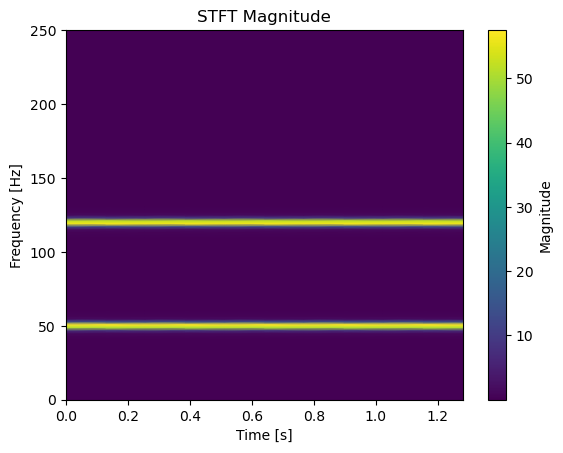

In [ ]:
#Short Time Fourier Transform Example-2/2

import numpy as np
import matplotlib.pyplot as plt

# Generate a sample signal
fs = 1000  # Sampling frequency
t = np.linspace(0, 2, 2 * fs, endpoint=False)
signal = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)

# Parameters
window_size = 256  # Window size
hop_size = 128  # Hop size
window = np.hanning(window_size)  # Hanning window

# STFT implementation
num_windows = (len(signal) - window_size) // hop_size + 1
stft_result = np.empty((window_size // 2 + 1, num_windows), dtype=np.complex64)

for i in range(num_windows):
    start = i * hop_size
    segment = signal[start:start + window_size]
    segment_windowed = segment * window
    fft_result = np.fft.rfft(segment_windowed)
    stft_result[:, i] = fft_result

# Frequency and time arrays
frequencies = np.fft.rfftfreq(window_size, d=1/fs)
times = np.arange(num_windows) * hop_size / fs

# Plot the STFT magnitude
plt.pcolormesh(times, frequencies, np.abs(stft_result), shading='gouraud')
plt.title("STFT Magnitude")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.colorbar(label="Magnitude")
plt.show()